<a href="https://colab.research.google.com/github/SuhailAhmad1/Machine_learning/blob/main/Classifictaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Important libraries and data_set

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import hinge_loss, ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV
from pprint import pprint
import matplotlib.pyplot as plt


In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
(X, y) = (X.to_numpy(), y.to_numpy())

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [8]:
print(y)

['5' '0' '4' ... '4' '5' '6']


In [10]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
#Feature Scaling
X = MinMaxScaler().fit_transform(X)

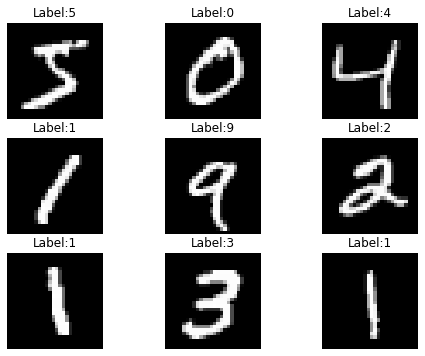

In [7]:
#Visualizing features and labels
num_images = 9
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows = factor, ncols = factor, figsize=(8,6))
idx_offset = 0
for i in range(factor):
  index = idx_offset+i*(factor)
  for j in range(factor):
    ax[i,j].imshow(X[index+j].reshape(28,28),cmap='gray')
    ax[i,j].set_title('Label:{0}'.format(str(y[index+j])))
    ax[i,j].set_axis_off()


In [11]:
#Splitting data 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary Classification : 0-Detector

In [21]:
y_train_0 = -1*np.ones(len(y_train))
y_test_0 = -1*np.ones(len(y_test))
index_0 = np.where(y_train == '0')
y_train_0[index_0] = 1
index_0 = np.where(y_test == '0')
y_test_0[index_0] = 1

In [77]:
y_test_0

array([-1., -1., -1., ..., -1., -1., -1.])

In [78]:
y_train_0[:10]

array([-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [24]:
 #Using Dummy classifier
base_clf = DummyClassifier(strategy="most_frequent")
base_clf.fit(X_train, y_train_0)

DummyClassifier(strategy='most_frequent')

In [25]:
base_clf.score(X_train,y_train_0)
base_clf.score(X_test, y_test_0)

0.902

**Using Perceptron** **Model**

In [79]:
bin_clf = Perceptron(max_iter = 100, random_state = 1729)
bin_clf.fit(X_train, y_train_0)

Perceptron(max_iter=100, random_state=1729)

In [80]:
print("Dimension of weights : ",bin_clf.coef_.shape)
print("Bias : ", bin_clf.intercept_)
print("Loss Function : ", bin_clf.loss_function_)

Dimension of weights :  (1, 784)
Bias :  [-108.]
Loss Function :  <sklearn.linear_model._sgd_fast.Hinge object at 0x7f0cf5e54870>


In [81]:
print("Training Loss : ", bin_clf.score(X_train, y_train_0))
print("Test Loss : ", bin_clf.score(X_test, y_test_0))

Training Loss :  0.99095
Test Loss :  0.989


**Confusion Matrix**

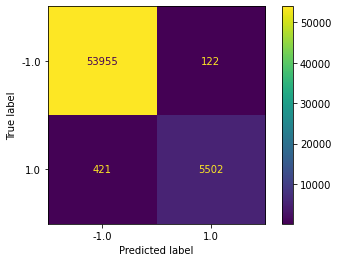

In [82]:
y_hat_train_0 = bin_clf.predict(X_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format='.5g')
plt.show()

In [83]:
cf_matrix = cm_display.confusion_matrix
tn = cf_matrix[0,0]
fn = cf_matrix[1,0]
fp = cf_matrix[0,1]
tp = cf_matrix[1,1]

In [84]:
print("Precision : ", tp/(tp+fp))
print("Recall : ", tp/(tp+fn))
print("Accuracy : ", (tn+tp)/(tn+tp+fn+fp))

Precision :  0.9783072546230441
Recall :  0.9289211548201924
Accuracy :  0.99095


In [85]:
precision_score(y_train_0,y_hat_train_0)

0.9783072546230441

In [86]:
recall_score(y_train_0,y_hat_train_0)

0.9289211548201924

In [87]:
print(classification_report(y_train_0,y_hat_train_0))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99     54077
         1.0       0.98      0.93      0.95      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



**CV**

In [36]:
bin_clf = Perceptron(max_iter=100, random_state=1729)
scores = cross_validate(bin_clf, X_train, y_train_0,
                        cv = 5,
                        scoring = ['precision','recall','f1'],
                        return_estimator=True)
pprint(scores)

{'estimator': [Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729)],
 'fit_time': array([1.62862396, 2.43856668, 1.70687866, 1.52128959, 1.99057055]),
 'score_time': array([0.04397798, 0.0427618 , 0.04072142, 0.04264784, 0.04524016]),
 'test_f1': array([0.95238095, 0.91666667, 0.94915254, 0.94117647, 0.95091763]),
 'test_precision': array([0.95890411, 0.98828125, 0.95319149, 0.95090439, 0.96200345]),
 'test_recall': array([0.94594595, 0.85472973, 0.94514768, 0.93164557, 0.94008439])}


In [37]:
scores['test_precision'].mean()

0.9626569391894069

In [38]:
scores['test_f1'].mean()

0.94205885179654

In [39]:
scores['test_recall'].mean()

0.9235106625612953

In [42]:
y_hat_train_00 = cross_val_predict(bin_clf,X_train, y_train_0, cv=5)

In [43]:
print(classification_report(y_train_0,y_hat_train_00))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99     54077
         1.0       0.96      0.92      0.94      5923

    accuracy                           0.99     60000
   macro avg       0.98      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



# Multiclass Classifier

In [45]:
from sklearn.preprocessing import LabelBinarizer
y_train_all = LabelBinarizer().fit_transform(y_train)
for i in range(10):
  print('{0}:{1}'.format(y_train[i],y_train_all[i]))

5:[0 0 0 0 0 1 0 0 0 0]
0:[1 0 0 0 0 0 0 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
9:[0 0 0 0 0 0 0 0 0 1]
2:[0 0 1 0 0 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
3:[0 0 0 1 0 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]


In [46]:
y_train_all.shape

(60000, 10)

In [47]:
clf = Perceptron(random_state=1729)

In [49]:
clf.fit(X_train,y_train)

Perceptron(random_state=1729)

In [50]:
clf.coef_.shape

(10, 784)

In [52]:
clf.intercept_.shape

(10,)

In [55]:
print(clf.predict(X_train[0].reshape(1,-1)))

['5']


In [56]:
y_hat = clf.predict(X_train)

In [57]:
print(classification_report(y_train,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5923
           1       0.94      0.98      0.96      6742
           2       0.89      0.90      0.90      5958
           3       0.86      0.87      0.87      6131
           4       0.89      0.94      0.91      5842
           5       0.81      0.88      0.85      5421
           6       0.92      0.97      0.94      5918
           7       0.91      0.94      0.92      6265
           8       0.92      0.77      0.84      5851
           9       0.92      0.82      0.87      5949

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.91      0.90      0.90     60000



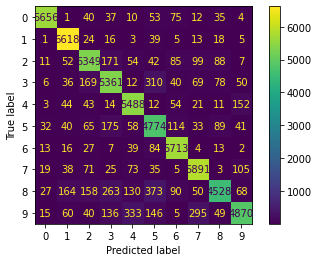

In [58]:
cm_displayy = ConfusionMatrixDisplay.from_predictions(y_train,y_hat,values_format='.5g')

**Lets use Pipelines to make code compact**

*   Binary Classification



In [59]:
estimators = [('std_scalar', MinMaxScaler()),('bin_clf', Perceptron())]
pipe = Pipeline(estimators)

In [60]:
pipe.fit(X_train,y_train_0)

Pipeline(steps=[('std_scalar', MinMaxScaler()), ('bin_clf', Perceptron())])

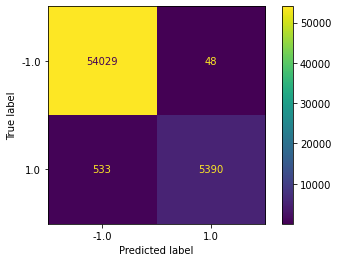

In [62]:
y_hat_train_0 = pipe.predict(X_train)
cm_dispaly_b = ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0, values_format='.5g')

# GridSearchCV

*   For Finding best eta0



In [67]:
scoring = make_scorer(hinge_loss,greater_is_better=False)
lr_grid = [1/2**n for n in range(1,6)]
bin_clf_gscv = GridSearchCV(Perceptron(), param_grid={"eta0":lr_grid}, scoring=scoring, cv=5)
bin_clf_gscv.fit(X_train, y_train_0)

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'eta0': [0.5, 0.25, 0.125, 0.0625, 0.03125]},
             scoring=make_scorer(hinge_loss, greater_is_better=False))

In [68]:
pprint(bin_clf_gscv.cv_results_)

{'mean_fit_time': array([1.61408668, 1.67707005, 1.46066394, 1.22807117, 1.10194893]),
 'mean_score_time': array([0.02047768, 0.0212409 , 0.02068057, 0.02018681, 0.02029734]),
 'mean_test_score': array([-0.0285    , -0.0285    , -0.02643333, -0.03066667, -0.0421    ]),
 'param_eta0': masked_array(data=[0.5, 0.25, 0.125, 0.0625, 0.03125],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'eta0': 0.5},
            {'eta0': 0.25},
            {'eta0': 0.125},
            {'eta0': 0.0625},
            {'eta0': 0.03125}],
 'rank_test_score': array([2, 2, 1, 4, 5], dtype=int32),
 'split0_test_score': array([-0.02166667, -0.02166667, -0.02166667, -0.02166667, -0.02166667]),
 'split1_test_score': array([-0.0395, -0.0395, -0.0395, -0.0395, -0.0395]),
 'split2_test_score': array([-0.02816667, -0.02816667, -0.02816667, -0.02816667, -0.02816667]),
 'split3_test_score': array([-0.023     , -0.023     , -0.023     , -0.04416667, -0.

In [73]:
bin_clf_best = bin_clf_gscv.best_estimator_

In [74]:
y_hat_tarin_0_best = bin_clf_best.predict(X_train)
print(classification_report(y_train_0,y_hat_tarin_0_best))

              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99     54077
         1.0       0.95      0.95      0.95      5923

    accuracy                           0.99     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.99      0.99      0.99     60000

